<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Week_8_Modifying_interpolation_focusing_on_higher_energy_pions_producing_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log
import pandas as pd

In [ ]:
## Reading in data from 2014 study; "Measurement of charged pion production yields offf the NuMI target"

Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

## Note; Column names appear in the first row of the dataframe.  This is an extra row.

## Renaming all of the columns of the dataframe using entries in the first row.
header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()
Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )
## Removing the extra row.
Pion_Plots_df1 = Pion_Plots_df1.drop(0)
Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']

In [ ]:
## Converting the first column of the dataframe from string to float values.

## Calculating the bin width of each row

interval_mid_list = []
bin_width_list = []

for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )

  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)

## Adding new columns to the dataframe

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()
Pion_Plots_df1['bin width'] = bin_width_array.tolist()

## Moving the newly created columns tto desired positions

column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value") # storing a ccolumn in the dataframe as a neew variable
Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move) # moving the stored column to the desired place in the dataframe.

column_to_move = Pion_Plots_df1.pop("bin width")
Pion_Plots_df1.insert(2, "bin width", column_to_move)

## Allocating colours to rows of the dataframe based upon pion transverse momentum
## Creating a new column in the dataframe to store these allocated colour codes

pT_colour_code_list = []

for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
  elif Z[0] == 0.10:
    colour_code = 1
  elif Z[0] == 0.20:
    colour_code = 2
  elif Z[0] == 0.30:
    colour_code = 3
  elif Z[0] == 0.40:
    colour_code = 4
  else:
    colour_code = 5

  pT_colour_code_list.append(colour_code)

pT_colour_code_array = np.array(pT_colour_code_list)

## Creating a new pT colour codes column in dataframe and moving it to the desired position.

Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)

## Converting columns into floats - in order to make plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)

## We divide the count by the bin width.  When we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

## creating a new column in the dataframe that will be filled with the final values to be plotted in the complete and correct plot

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

#################### Using df.loc - this is in line with the Copy on Write - Old way is through Chained Assignment (for loop etc., etc.) ####################

Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300

## Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)


## Adding two columns for plotting purposes

Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)


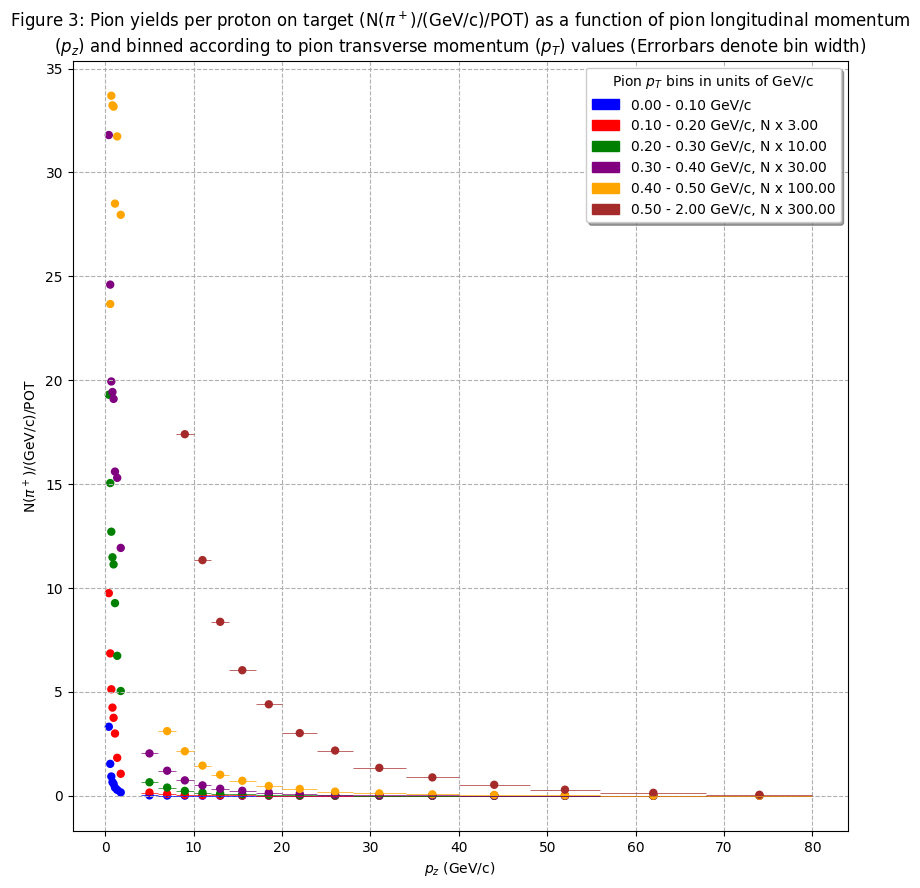

In [ ]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
            ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#              ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )

# plt.xscale("log")
# plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

Begin new interpolation work below

Produce interpolations based upon the blue, red, green and purple data points. REMEMBER TO ONLY USE PIONS OF 5GEV AND UP.

Then produce the histograms using the function that Abbey helped edit.



In [ ]:
## Interpolation ##
#display(Pion_Plots_df1)


In [ ]:
######################### SEE COMMENT AT END OFF FFIRST LINE ######################

# # colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )    ## I have no idea how this line of code works ##
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )
green_dots_new_x = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 1.5]
green_dots_new_y = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_new_x) ) : len(green_dots_only_y_axis_values_list) ]  )

red_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['Final pi^+ plot value'] )
red_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['pz (GeV=c) - mid range value'] )
red_dots_new_x = [red_dots_only_x_axis_values_list for red_dots_only_x_axis_values_list in red_dots_only_x_axis_values_list if red_dots_only_x_axis_values_list >= 5]
red_dots_new_y = ( red_dots_only_y_axis_values_list[  len(red_dots_only_y_axis_values_list)  - ( len(red_dots_new_x) ) : len(red_dots_only_y_axis_values_list) ]  )

blue_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['Final pi^+ plot value'] )
blue_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['pz (GeV=c) - mid range value'] )
blue_dots_new_x = [blue_dots_only_x_axis_values_list for blue_dots_only_x_axis_values_list in blue_dots_only_x_axis_values_list if blue_dots_only_x_axis_values_list >= 5 ]
blue_dots_new_y = ( blue_dots_only_y_axis_values_list[  len(blue_dots_only_y_axis_values_list)  - ( len(blue_dots_new_x) ) : len(blue_dots_only_y_axis_values_list) ] )



In [ ]:
# # colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

# red_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] >= 5  ]['Final pi^+ plot value'] )

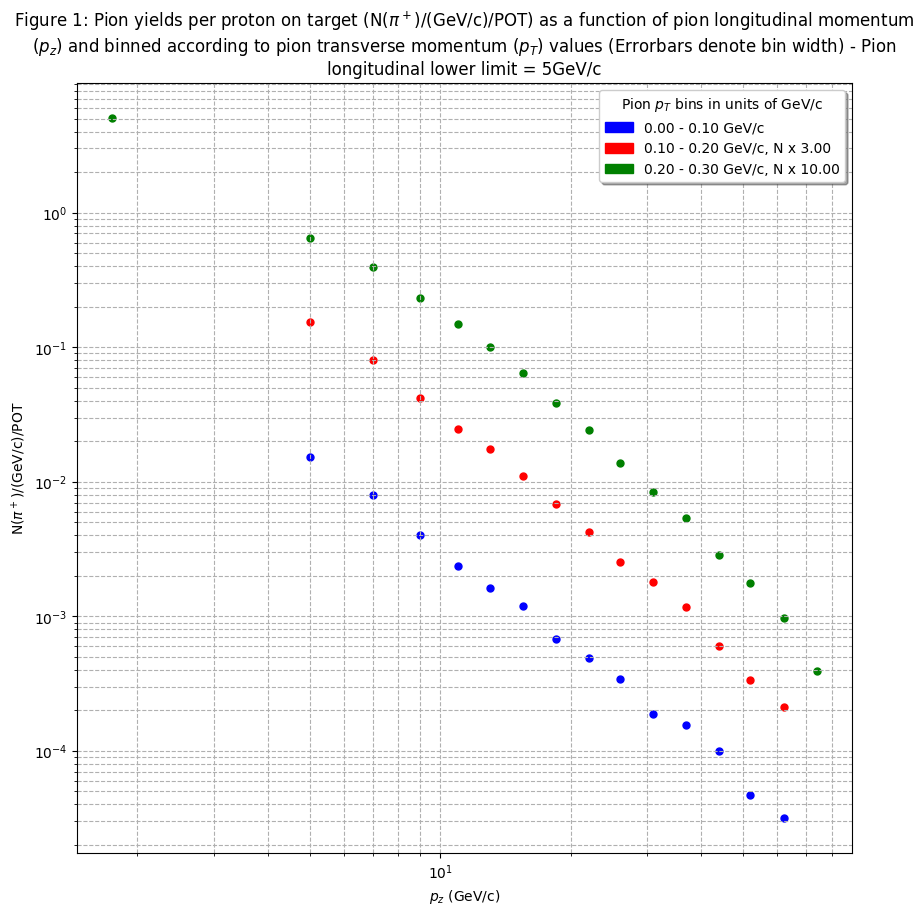

In [ ]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
#purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
#orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
#brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch  ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )


#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#              ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 1: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

In [ ]:
xnew_array = np.linspace(min(green_dots_new_x), max(green_dots_new_x), 1000)

green_dots_new_x_array = np.array(green_dots_new_x)

green_dots_new_y_array = np.array(green_dots_new_y)

# Need to extrapolate the interpolato

chosen_interpolator = interpolate.interp1d(   green_dots_new_x_array  ,    green_dots_new_y_array , kind = "quadratic" , bounds_error = False  )

ynew_array = chosen_interpolator(xnew_array)

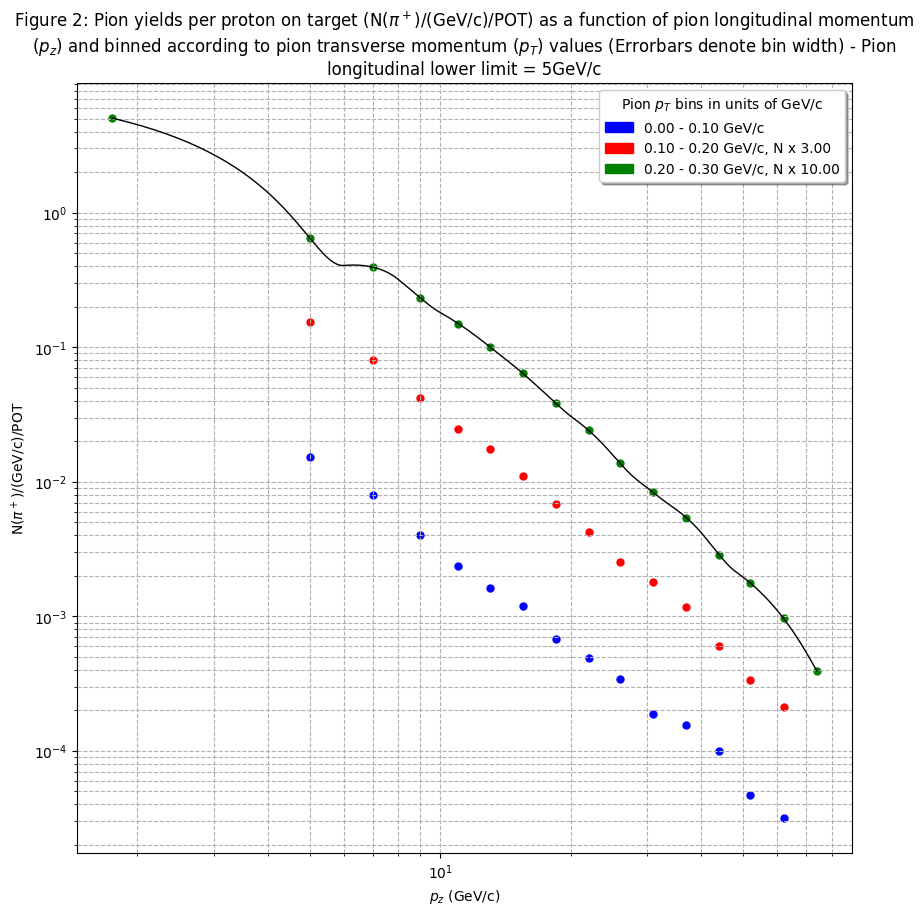

In [ ]:
colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')

handles_for_legend =  [  blue_patch , red_patch ,  green_patch  ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )

plt.plot(  xnew_array  , ynew_array  , color = "black" , label = "interpolate.interp1d() quadratic" , linewidth = 1 )



plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 2: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

In [ ]:
m_pi = 139.6 * ( 10 ** -3 )        # Units = GeV ( Source = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_v_star = 29.8 * ( 10 ** -3 )     # Units = GeV ( Source =  = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

# E_pro = 12                     # Units = GeV  ( Source = https://en.wikipedia.org/wiki/Fermilab#Fermilab_Accelerator_Complex )

# # E_pro = 120

In [ ]:
def FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( theta ):

        #E_v = np.linspace( 0.5 , 10 , 10000000 )

        #E_v = np.linspace( 1.8 , 10 , 10000000 )

        E_v = np.linspace( 1.5 , 10 , 10000000 )

        #E_v_2 = np.linspace( 0.5 , 10 , 10000000 )

        my_mean = 120   ## This is the correct mean proton energy

        my_std = 6   # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta

        # Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) )

        #### INSERT PION WEIGHTING HERE ####

        Weighted_Pion_Flux =  chosen_interpolator(P_pi)

        # E_pi_weighted = best_interpolator( P_pi ) ## I assume I can insert pion energies into the interpolation because I am using GeV/c - so I don't need to do any division by the speed of light.

        #### INSERT PION WEIGHTING HERE ####

        #### Below here, all E_pi should be replaced with E_pi_weighted


        # Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )    ## ORIGINAL LINE that failed to incorporate the array of proton energies ##

        # Rel_Neu_Flux = ( ( ( E_pro_array - E_pi_weighted ) ** 5 ) * ( ( E_pi_weighted * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        ####################### Attempting to remedy the negative frequency situation #######################   Lacking intuition

        # Rel_Neu_Flux = Rel_Neu_Flux[ Rel_Neu_Flux < 0] # This keeps only the negative frequencies - having the opposite desired effect

        # Rel_Neu_Flux[ Rel_Neu_Flux < 0] = 0 # This collapses all counts to zero

        # Rel_Neu_Flux[ Rel_Neu_Flux > 0] # This has no effect

        # for i in range(1, len(Rel_Neu_Flux)):
        #         neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

        #         if neighbouring_element_difference == 0.000:

        #                 break
        #         else:

        #                 continue

        # Rel_Neu_Flux = Rel_Neu_Flux[:i]

        # E_v = E_v[:i]

        # return E_v_2 , E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted

        return  E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted

In [ ]:
E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.0146 )

<ipython-input-198-01d690b9cb59>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


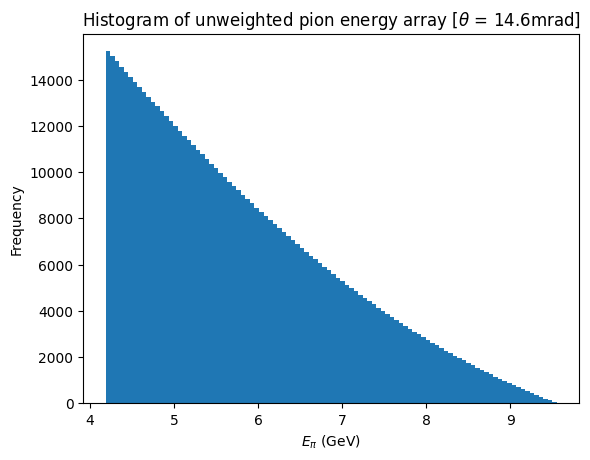

In [ ]:
## Unweighted Pion Energy Array ##

E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.0146 )

plt.hist( E_pi , bins = 100 , histtype = "bar" )

plt.title(r"Histogram of unweighted pion energy array [$\theta$ = 14.6mrad]")

plt.xlabel(r"$E_{\pi}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

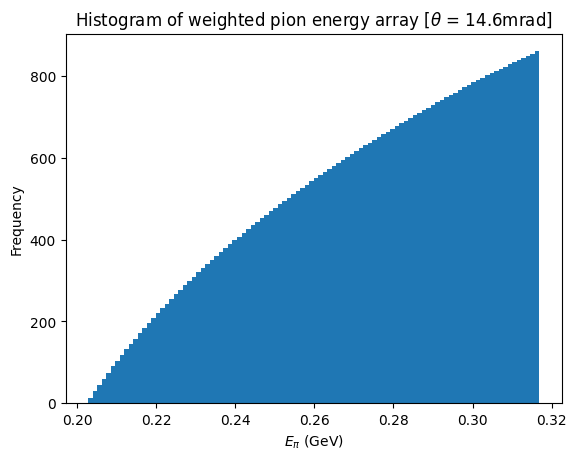

In [ ]:
## Weighted Pion Energy Array ##

plt.hist( E_pi_weighted , bins = 100 , histtype = "bar" )

plt.title(r"Histogram of weighted pion energy array [$\theta$ = 14.6mrad]")

plt.xlabel(r"$E_{\pi}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

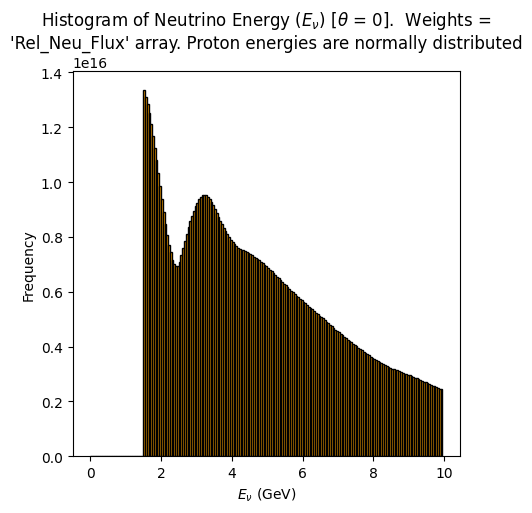

In [ ]:
# Histogram of relative neutrino flux ON BEAN AXIS

E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.00 )
#display((np.shape(y_1)))
plt.figure(figsize=(5, 5))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 0].  Weights = 'Rel_Neu_Flux' array. Proton energies are normally distributed " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-178-323bdf0099dd>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


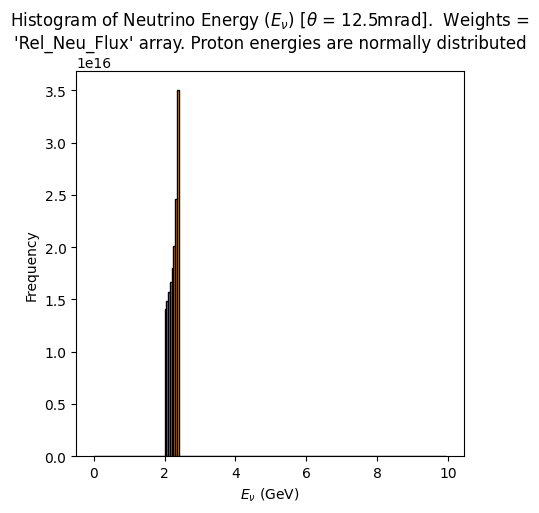

In [ ]:
# Histogram of relative neutrino flux for portion of detector at smallest angular off-axis angle
E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.0125 )

#display((np.shape(y_1)))
plt.figure(figsize=(5, 5))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 12.5mrad].  Weights = 'Rel_Neu_Flux' array. Proton energies are normally distributed " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-178-323bdf0099dd>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


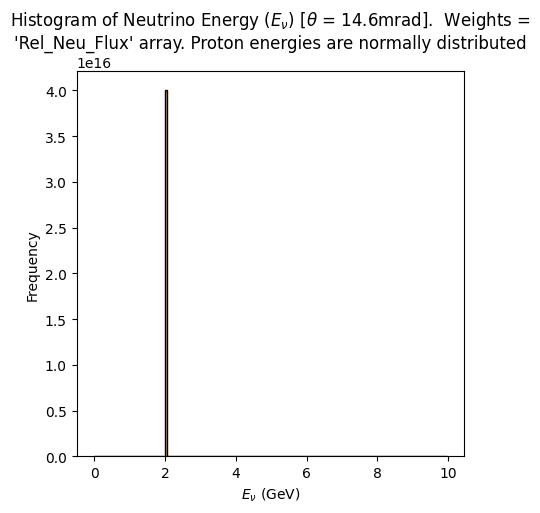

In [ ]:
# Histogram of relative neutrino flux for middle portion of detector
E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.0146 )
#display((np.shape(y_1)))
plt.figure(figsize=(5, 5))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 14.6mrad].  Weights = 'Rel_Neu_Flux' array. Proton energies are normally distributed " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-178-323bdf0099dd>:18: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


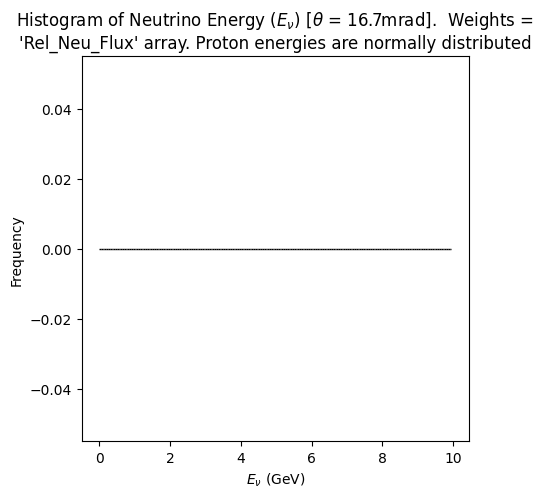

In [ ]:
# Histogram of relative neutrino flux for portion of detector at largest off-axis angle
E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.0167 )
#display((np.shape(y_1)))
plt.figure(figsize=(5, 5))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Histogram of Neutrino Energy ($E_{\nu}$) [$\theta$ = 16.7mrad].  Weights = 'Rel_Neu_Flux' array. Proton energies are normally distributed " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

(10000000,)
(10000000,)


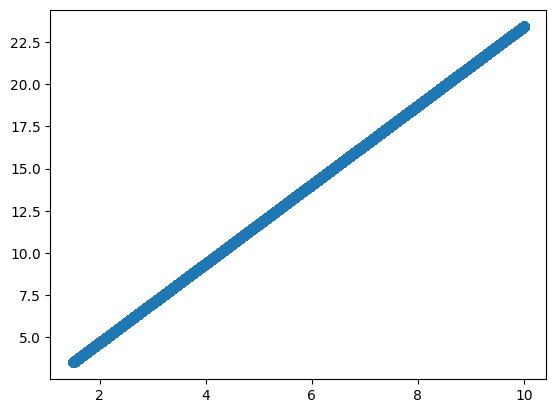

In [ ]:
E_v , Rel_Neu_Flux , E_pro_array , E_pi , E_pi_weighted = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.00 )
print(np.shape(E_v))
print(np.shape(E_pi))
plt.scatter(  E_v , E_pi )

#What to do next

###Tidy up the code
//
###Establish what is going on with the minimum value of the neutrino energy.  Why is it that certain values for the lower bound of the linspace array produce errors?  Where exactly are these errors emanating from?  This could take some time...
//
###Also, what is the significance of these errors.
//
###Establish what it is that Abbey's suggestions to the code do.  Did she modify any of my funcction code in a way that I do not understand.
//
#You need to produce a distribution of theta max against Pion energy.  This distribution then needs to be numerically integrated to ascertain weightings that can be used to reduce the influnce of low energy pions.
#The intetion of this is to yield histograms of relative neutrino flux that each have a single peak at an approprriate neutrino energy value.  This peak needs to move in a certain way as the beam angular offset increases/ decreases.
#The idea is that theta max star (the maximum angle in the pion rest frame), corresponds to theta max (the maximum angle in the lab rest frame).  
#WHAT DOES THIS ANGLE CORRESPOND TO?
#ANSWER: THE ANGLE IN QUESTION IS THE "ANGLE BETWEEN THE NEUTRINO AND ITS PARENT PION".  BOOM.  
//
//
#She said something about a three dimensional plot... I can't recall what particularr plot this was?  Or whether she ended up not thinking it was a 3 dimensional plot?
#Perhaps she was saying that the plot off theta max  against pion energy could be made three dimensional???
//
//
#NEXT: You really neeed to start using scripts.  Just stick some code on scripts and then use VScode to run the scriipts such that you can begin to produce some plots.
#Sripts, VScode and Environments will massively increase the agility you work with, and they will open up new possiblities regarding ways to present data. So, just start.  The hardest part is starting.
//



#RANDOM STUFF TO LEARN BELOW...

In [ ]:
[green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 5]

# green_dots_only_x_axis_values_greater_than_5 >=

# green_dots_only_x_axis_values_greater_than_5 = Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] >= 5.0, "Final pi^+ plot value"]

# #  Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"]

#display(green_dots_only_x_axis_values_list)

[5.0,
 7.0,
 9.0,
 11.0,
 13.0,
 15.5,
 18.5,
 22.0,
 26.0,
 31.0,
 37.0,
 44.0,
 52.0,
 62.0,
 74.0]

In [ ]:
display(green_dots_only_x_axis_values_list)

[0.4,
 0.56,
 0.685,
 0.815,
 0.94,
 1.1,
 1.35,
 1.75,
 5.0,
 7.0,
 9.0,
 11.0,
 13.0,
 15.5,
 18.5,
 22.0,
 26.0,
 31.0,
 37.0,
 44.0,
 52.0,
 62.0,
 74.0]

Produce plot that includes only the interpolated data.

In [ ]:
# #hi = ( Pion_Plots_df1["pz (GeV=c) - mid range value"] >= 5.0 )
# #display(hi)
# # Pion_Plots_df1.loc[Pion_Plots_df1["pz (GeV=c) - mid range value"] >= 5.0, "pz (GeV=c) - mid range value"] = hi
# # display(hi)

# display(Pion_Plots_df1)

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,Final pi^+ plot value,ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),error bar capsize,error bar line width
1,"[0.30,0.50)",0.4,0.10,0,"[0.00,0.10)",3.32E-01,0.332000,3.320000,3.320000,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,1.0,0.5
2,"[0.30,0.50)",0.4,0.10,1,"[0.10,0.20)",3.25E-01,0.325000,3.250000,9.750000,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,1.0,0.5
3,"[0.30,0.50)",0.4,0.10,2,"[0.20,0.30)",1.93E-01,0.193000,1.930000,19.300000,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,1.0,0.5
4,"[0.30,0.50)",0.4,0.10,3,"[0.30,0.40)",1.06E-01,0.106000,1.060000,31.800000,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,1.0,0.5
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,0.092000,1.533333,1.533333,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"[56.00,68.00)",True,6.00,5,"[0.50,2.00)",2.81E-03,0.002810,0.000468,0.140500,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58,1.0,0.5
121,"[68.00,80.00)",True,6.00,2,"[0.20,0.30)",2.36E-04,0.000236,0.000039,0.000393,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.5
122,"[68.00,80.00)",True,6.00,3,"[0.30,0.40)",1.88E-04,0.000188,0.000031,0.000940,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.5
123,"[68.00,80.00)",True,6.00,4,"[0.40,0.50)",1.88E-04,0.000188,0.000031,0.003133,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.5


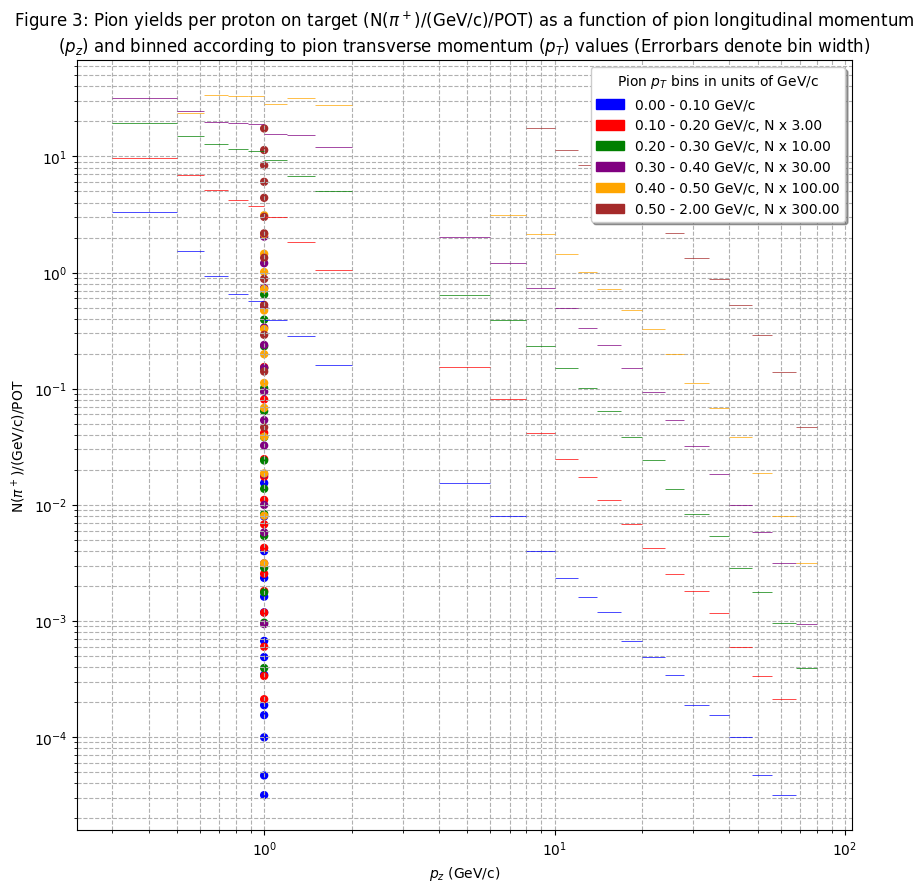

In [ ]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

#  Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"]

plt.scatter(   x = ( Pion_Plots_df1["pz (GeV=c) - mid range value"] >= 5.0 )  ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )


plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
            ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

You are going to need to go through all of Anney's edits... and understand them.  So get moving.